# MNIST con CNN

In [ ]:
# Importamos TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Cargamos el dataset MNIST
mnist = keras.datasets.mnist

# Dividimos el dataset en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizamos las imágenes para que sus valores estén en el rango de 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape de las imágenes para añadir un canal (necesario para las capas convolucionales)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Definimos el modelo
model = tf.keras.Sequential([
    # Capa convolucional, 32 filtros de 3x3 y función de activación ReLU
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Capa de pooling, reduciendo la dimensión espacial a la mitad
    MaxPooling2D(pool_size=(2, 2)),

    # Otra capa convolucional, 64 filtros de 3x3 y función de activación ReLU
    Conv2D(32, (3, 3), activation='relu'),

    # Otra capa de pooling
    MaxPooling2D(pool_size=(2, 2)),

    # Aplanamos el resultado para alimentar a las capas densas
    Flatten(),

    # Capa densa con 128 nodos y función de activación ReLU
    Dense(64, activation='relu'),

    # Capa de salida con 10 nodos y función de activación Softmax
    Dense(10, activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamos el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# El resto del código, como la visualización de datos, evaluación del modelo y pruebas de predicción, se mantienen iguales.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8847 - loss: 0.3822 - val_accuracy: 0.9810 - val_loss: 0.0575
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0559 - val_accuracy: 0.9853 - val_loss: 0.0439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0401 - val_accuracy: 0.9881 - val_loss: 0.0381
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0276 - val_accuracy: 0.9906 - val_loss: 0.0297
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9891 - val_loss: 0.0363
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9874 - val_loss: 0.0418
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0099 -

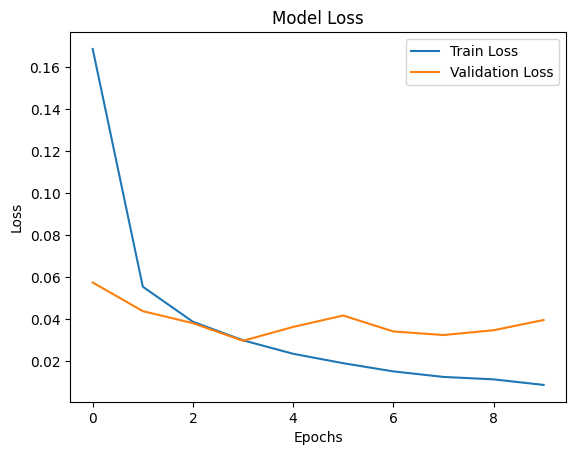

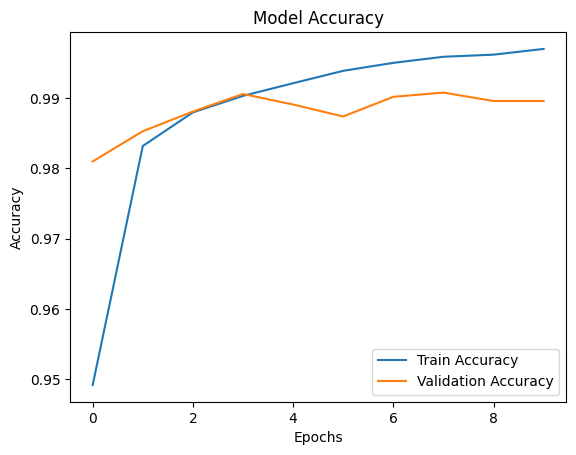

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión:
[[ 976    1    1    0    0    0    0    1    1    0]
 [   0 1127    0    0    0    0    5    0    3    0]
 [   1    1 1022    3    0    0    1    3    1    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  977    0    1    0    1    3]
 [   2    0    0    8    0  880    1    0    1    0]
 [   5    1    0    0    4    1  946    0    1    0]
 [   0    2    8    0    4    0    0 1004    2    8]
 [   2    0    2    3    0    2    1    1  960    3]
 [   0    0    0    3    4    4    0    0    0  998]]
Accuracy: 0.9896

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.

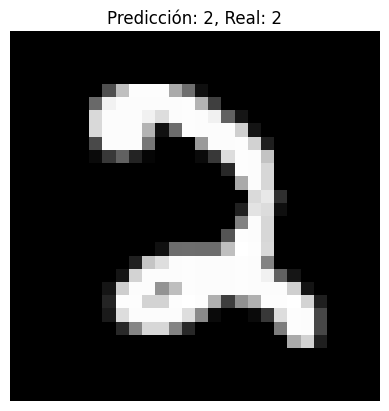

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Gráfico para accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

import numpy as np

# Predicciones del modelo
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, test_predictions_classes)
print("Matriz de Confusión:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(test_labels, test_predictions_classes)
print("Accuracy:", accuracy)

# Precision, Recall y F1 Score para cada clase
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions_classes))

import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos un índice aleatorio del conjunto de test
# Puedes cambiar este índice para probar diferentes imágenes
indice = np.random.randint(0, len(test_images))

# Hacemos una predicción para la imagen seleccionada
imagen = test_images[indice]
prediccion = model.predict(np.array([imagen]))
print(f'La salida de la red es {prediccion}')
clase_predicha = np.argmax(prediccion)

# Obtenemos la etiqueta real
etiqueta_real = test_labels[indice]

# Mostramos la imagen junto con las etiquetas predicha y real
plt.imshow(imagen.reshape(28, 28), cmap='gray')
plt.title(f"Predicción: {clase_predicha}, Real: {etiqueta_real}")
plt.axis('off')
plt.show()